This notebook for plotting tracer transport and budget diagnsotics

In [1]:
import xarray as xr
import numpy as np
import scipy.stats as sc
import matplotlib.pyplot as plt
import xmip.preprocessing as xmip
import glob
import xskillscore as xs

import matplotlib.image as image
import matplotlib.patches as patches

import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmaps
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import warnings
warnings.filterwarnings("ignore")

## Figure: Overturning and tracer transport anomalies

In [3]:
ppdir = ("/gws/nopw/j04/unicorns/carbon_add_redis" + 
         "/Fast_SLow_NAO/MOHC/UKESM1-0-LL/historical/")

var_list = ['thetao', 'dissic']

ds = []
for var in var_list:
    d = xr.open_dataset(ppdir + "all_ensembles/Timeseries/" + var + "_Transport_Atlantic.nc")
    d = d.drop('time').assign_coords(time=d['time.year'] + d['time.month']/12 - 1902)
    d = d.assign_coords(lat=d['latitude'].values)
    ds.append(d)

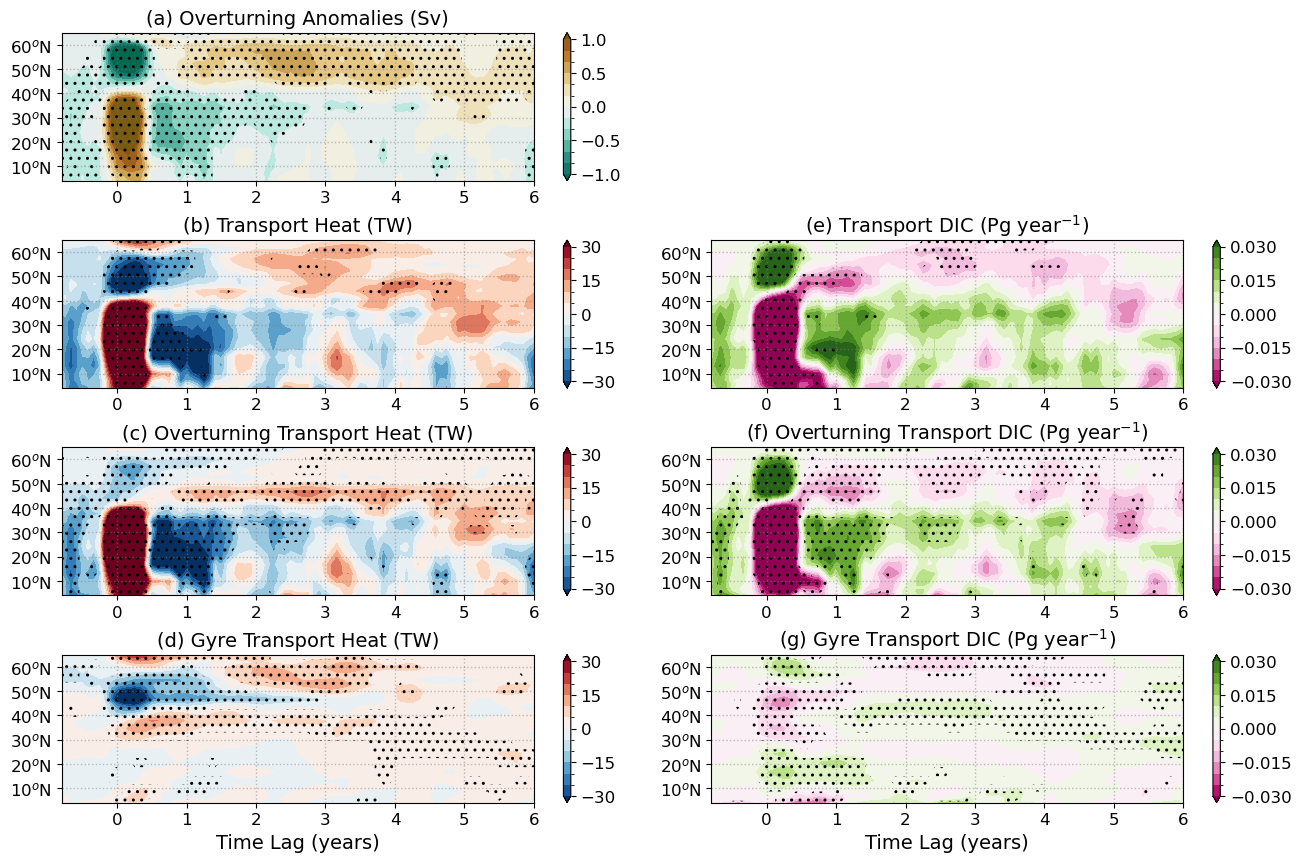

In [4]:
grid1 = plt.GridSpec(4, 2, wspace=0.1, hspace=0.4)
fig = plt.figure(figsize=[16,10])

hatch_dense = 2
fac = [1.e12, 1.e15/(12*3600*24*365)] # convert heat transport to TW and DIC transport to Pg/year
lim_vmax = [30., 0.03]
cb_map = [cmaps.MPL_RdBu_r, cmaps.MPL_PiYG]
titl_list = ['Heat (TW)', r'DIC (Pg year$^{-1}$)']
          
for i in range(0,2):
    if(i==0):
        ax = fig.add_subplot(grid1[i, 0])
        tmp = ds[i]['Overturning_z'].isel(lev=45)/1.e6
        tmp_cfd = (ds[i]['Overturning_z_confidence_upper'] - 
                   ds[i]['Overturning_z_confidence_lower']).isel(lev=45) * 0.5/1.e6 # in Sv
        p = tmp.plot.contourf(ax=ax, y='lat', x='time', levels = 13, vmin = -1., vmax = 1.,
                          cmap=cmaps.NEO_div_vegetation_c_r, add_labels=False, add_colorbar=False, extend='both')
        ax.contourf(tmp['time'], tmp['lat'], (np.abs(tmp) > np.abs(tmp_cfd)), colors='none', 
                    levels=[.5,1.,1.5, 2.], hatches=[hatch_dense*'.'])
        ax.set_xlim([-0.8, 6.]);
        ax.set_ylim([4., 65.]);
        ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
        plt.yticks(np.arange(10,61,10), [r'$10^o$N', r'$20^o$N', r'$30^o$N', r'$40^o$N', 
                                         r'$50^o$N', r'$60^o$N'], fontsize = 12);
        plt.xticks(fontsize = 12);
        cb = fig.colorbar(p, ax=ax, ticks=[-1, -0.5, 0, 0.5, 1], extend='both')
        cb.ax.tick_params(labelsize=12)
        ax.set_title('(a) Overturning Anomalies (Sv)', fontsize=14)

    # overturning tracer transport
    ax = fig.add_subplot(grid1[2,i])
    tmp = ds[i][var_list[i] + '_Transport_overturning']/fac[i]
    tmp_cfd = (ds[i][var_list[i] + '_Transport_overturning_confidence_upper'] - 
               ds[i][var_list[i] + '_Transport_overturning_confidence_lower']) * 0.5/fac[i]
    p = tmp.plot.contourf(ax=ax, y='lat', x='time', levels = 13, vmin = -lim_vmax[i], vmax = lim_vmax[i],
                      cmap=cb_map[i], add_labels=False, add_colorbar=False, extend='both')
    ax.contourf(tmp['time'], tmp['lat'], (np.abs(tmp) > np.abs(tmp_cfd)), colors='none', 
                levels=[.5,1.,1.5,2.], hatches=[hatch_dense*'.'])
    cb = fig.colorbar(p, ax=ax, ticks=[-lim_vmax[i], -lim_vmax[i]/2, 0, lim_vmax[i]/2., lim_vmax[i]], extend='both')
    cb.ax.tick_params(labelsize=12)
    ax.set_xlim([-0.8, 6.]);
    ax.set_ylim([4., 65.]);
    ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
    plt.yticks(np.arange(10,61,10), [r'$10^o$N', r'$20^o$N', r'$30^o$N', r'$40^o$N', 
                                     r'$50^o$N', r'$60^o$N'], fontsize = 12);
    plt.xticks(fontsize = 12);
    ax.set_title('(' + chr(97+3*i+2) + ') Overturning Transport ' + titl_list[i], fontsize=14)
    
    # gyre tracer transport
    ax = fig.add_subplot(grid1[3,i])
    tmp = ds[i][var_list[i] + '_Transport_gyre']/fac[i] # in PW
    tmp_cfd = (ds[i][var_list[i] + '_Transport_gyre_confidence_upper'] - 
               ds[i][var_list[i] + '_Transport_gyre_confidence_lower']) * 0.5/fac[i]
    p = tmp.plot.contourf(ax=ax, y='lat', x='time', levels = 13, vmin = -lim_vmax[i], vmax = lim_vmax[i],
                      cmap=cb_map[i], add_labels=False, add_colorbar=False, extend='both')
    ax.contourf(tmp['time'], tmp['lat'], (np.abs(tmp) > np.abs(tmp_cfd)), colors='none', 
                levels=[.5,1.,1.5, 2.], hatches=[hatch_dense*'.'])
    cb = fig.colorbar(p, ax=ax, ticks=[-lim_vmax[i], -lim_vmax[i]/2, 0, lim_vmax[i]/2., lim_vmax[i]], extend='both')
    cb.ax.tick_params(labelsize=12)
    ax.set_xlim([-0.8, 6.]);
    ax.set_ylim([4., 65.]);
    ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
    plt.yticks(np.arange(10,61,10), [r'$10^o$N', r'$20^o$N', r'$30^o$N', r'$40^o$N', 
                                     r'$50^o$N', r'$60^o$N'], fontsize = 12);
    plt.xticks(fontsize = 12);
    ax.set_xlabel('Time Lag (years)', fontsize=14)
    ax.set_title('(' + chr(97+3*i+3) + ') Gyre Transport ' + titl_list[i], fontsize=14)

    # Total tracer transport
    ax = fig.add_subplot(grid1[1,i])
    tmp = ds[i][var_list[i] + '_Transport']/fac[i]
    tmp_cfd = (ds[i][var_list[i] + '_Transport_confidence_upper'] - 
               ds[i][var_list[i] + '_Transport_confidence_lower'])/fac[i]
    p = tmp.plot.contourf(ax=ax, y='lat', x='time', levels = 13, vmin = -lim_vmax[i], vmax = lim_vmax[i],
                      cmap=cb_map[i], add_labels=False, add_colorbar=False, extend='both')
    ax.contourf(tmp['time'], tmp['lat'], (np.abs(tmp) > np.abs(tmp_cfd)), colors='none', 
                levels=[.5,1.,1.5, 2.], hatches=[hatch_dense*'.'])
    ax.set_xlim([-0.8, 6.]);
    ax.set_ylim([4., 65.]);
    ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
    plt.yticks(np.arange(10,61,10), [r'$10^o$N', r'$20^o$N', r'$30^o$N', r'$40^o$N', 
                                     r'$50^o$N', r'$60^o$N'], fontsize = 12);
    plt.xticks(fontsize = 12);
    cb = fig.colorbar(p, ax=ax, ticks=[-lim_vmax[i], -lim_vmax[i]/2, 0, lim_vmax[i]/2., lim_vmax[i]], extend='both')
    cb.ax.tick_params(labelsize=12)
    ax.set_title('(' + chr(97+3*i+1) + ') Transport ' + titl_list[i], fontsize=14)

#fig.savefig('/home/users/hkhatri/Plots/Figures_Carbon_Thermal_2024/Tracer_Transport.pdf', 
#            dpi=300,bbox_inches='tight');
#fig.savefig('/home/users/hkhatri/Plots/Figures_Carbon_Thermal_2024/Tracer_Transport.png', 
#            dpi=300,bbox_inches='tight');

## Figure: Heat and DIC budget

In [5]:
# upper 100 m budgets

ppdir = ("/gws/nopw/j04/unicorns/carbon_add_redis" + 
         "/Fast_SLow_NAO/MOHC/UKESM1-0-LL/historical/")

var_list = ['thetao', 'dissic']

ds = []
for var in var_list:
    d = xr.open_dataset(ppdir + "all_ensembles/Timeseries/" + var + "_Budget_new_regions_2_depth_100.nc")
    d = d.drop('time').assign_coords(time=d['time.year'] + d['time.month']/12 - 1902 + 6./12)
    ds.append(d)

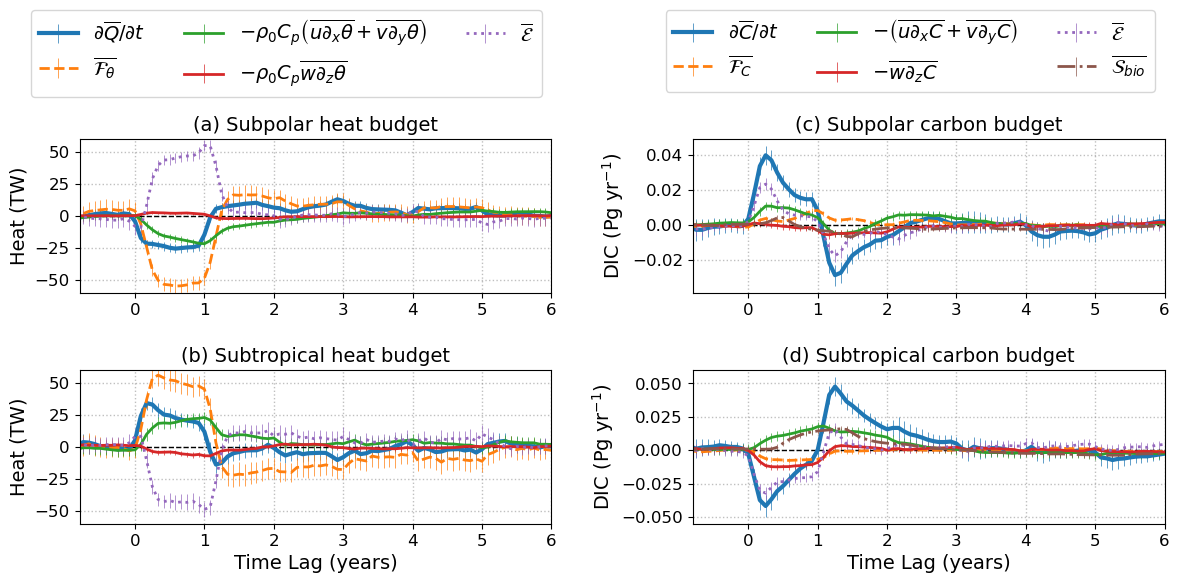

In [10]:
region_list = ['_North_Atlantic_Subpolar', '_North_Atlantic_Subtropical']
reg_lab = [r'Subpolar', r'Subtropical']


fac = [1./1e12, 1000. * 1.e-15 * 3600*24*365] # convert heat budget in terawatts (from watts) and DIC budget in Pg/year (from kg/s)

label_tend = [r'${\partial \overline{Q}/\partial t}$', r'${\partial \overline{C}/\partial t}$']
label_hor = [r'$-\rho_0C_p\left(\overline{u\partial_x\theta} + \overline{v\partial_y\theta} \right)$',
             r'$-\left(\overline{u\partial_xC} + \overline{v\partial_yC} \right)$']
label_ver = [r'$-\rho_0C_p\overline{w\partial_z\theta}$',
             r'$-\overline{w\partial_zC}$']

grid1 = plt.GridSpec(2, 2, wspace=0.3, hspace=0.5)
fig = plt.figure(figsize=[14,5])

for i in range(0,2):
    j = 0
    for region in region_list:
        ax = fig.add_subplot(grid1[j, i])
        ax.errorbar(ds[i]['time'], ds[i]['dt_' + var_list[i] + region]* fac[i], 
                    yerr = (ds[i]['dt_' + var_list[i] + region + '_confidence_upper'] 
                            - ds[i]['dt_' + var_list[i] + region + '_confidence_lower'])* fac[i]*0.5, #0.5 factor proper errorbars
                    lw=3., elinewidth=0.5, label= label_tend[i])
        if(i==0):
            ax.errorbar(ds[i]['time'], ds[i]['hfds' + region]* fac[i], 
                        yerr = (ds[i]['hfds' + region + '_confidence_upper'] - 
                                ds[i]['hfds' + region + '_confidence_lower'])* fac[i]*0.5,
                        lw=2., elinewidth=0.5, ls='--', label= r'$\overline{\mathcal{F}_{\theta}}$') 
            # 95% confidence interval (+- yerr = (upper-bound -lower_bound)*0.5 = 2*standard_error)
        else:
            ax.errorbar(ds[i]['time'], ds[i]['fgco2' + region]* fac[i], 
                        yerr = (ds[i]['fgco2' + region + '_confidence_upper'] - 
                                ds[i]['fgco2' + region + '_confidence_lower'])* fac[i]*0.5,
                        lw=2., elinewidth=0.5, ls='--', label= r'$\overline{\mathcal{F}_{C}}$')
            
        ax.errorbar(ds[i]['time'], ds[i][var_list[i] + '_hor_div' + region]* fac[i], 
                    yerr = (ds[i][var_list[i] + '_hor_div' + region + '_confidence_upper'] -
                           ds[i][var_list[i] + '_hor_div' + region + '_confidence_lower'])* fac[i] * 0.5, 
                    lw=2., elinewidth=0.5, label= label_hor[i])
        ax.errorbar(ds[i]['time'], ds[i][var_list[i] + '_ver_div' + region]* fac[i], 
                    yerr = (ds[i][var_list[i] + '_ver_div' + region + '_confidence_upper'] -
                           ds[i][var_list[i] + '_ver_div' + region + '_confidence_lower'])* fac[i] * 0.5, 
                    lw=2., elinewidth=0.5, label= label_ver[i])

        if(i==0):
            ax.errorbar(ds[i]['time'], ds[i][var_list[i]+ '_res' + region]* fac[i], 
                        yerr = (ds[i][var_list[i]+ '_res' + region + '_confidence_upper'] -
                                ds[i][var_list[i]+ '_res' + region + '_confidence_lower'])* fac[i]*0.5, ls=':', 
                        lw=2., elinewidth=0.5, label=r'$\overline{\mathcal{E}}$')
        else:
            ax.errorbar(ds[i]['time'], ds[i][var_list[i]+ '_res_bio' + region]* fac[i], 
                        yerr = (ds[i][var_list[i]+ '_res_bio' + region + '_confidence_upper'] -
                                ds[i][var_list[i]+ '_res_bio' + region + '_confidence_lower'])* fac[i]*0.5, ls=':', 
                        lw=2., elinewidth=0.5, label=r'$\overline{\mathcal{E}}$')
            ax.errorbar(ds[i]['time'], ds[i]['particulate_flux' + region]* fac[i], 
                        yerr = (ds[i]['particulate_flux' + region + '_confidence_upper'] -
                                ds[i]['particulate_flux' + region + '_confidence_lower'])* fac[i]*0.5, ls='-.', 
                        lw=2., elinewidth=0.5, label=r'$\overline{\mathcal{S}_{bio}}$')

        ax.set_xlim([-0.8, 6.]);
        plt.xticks(fontsize = 12); plt.yticks(fontsize = 12);
        ax.axhline(y=0, ls='--', lw=1, color='k')
        ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
        
        if(j==1):
            ax.set_xlabel('Time Lag (years)', fontsize=14)
            plt.legend(loc='upper right', bbox_to_anchor=(1.0, 3.4), ncol=3, fontsize=14);

        if(i==0):
            ax.set_ylabel('Heat (TW)', fontsize=14)
            ax.set_ylim([-60., 60.]);
            plt.yticks(np.arange(-50,60,25))
            ax.set_title('(' + chr(97+j) + ') ' + reg_lab[j] + ' heat budget', fontsize=14)
        else:
            ax.set_ylabel(r'DIC (Pg yr$^{-1}$)', fontsize=14)
            #ax.set_ylim([-0.05, 0.05]);
            #plt.yticks(np.arange(-0.04,0.05,0.02))
            ax.set_title('(' + chr(99+j) + ') ' + reg_lab[j] + ' carbon budget', fontsize=14)
        
        j = j + 1

fig.savefig('/home/users/hkhatri/Plots/Figures_Carbon_Thermal_2024/Tracer_Budget.pdf', 
            dpi=300,bbox_inches='tight');
fig.savefig('/home/users/hkhatri/Plots/Figures_Carbon_Thermal_2024/Tracer_Budget.png', 
            dpi=300,bbox_inches='tight');

In [11]:
# budget in upper 1 km

ppdir = ("/gws/nopw/j04/unicorns/carbon_add_redis" + 
         "/Fast_SLow_NAO/MOHC/UKESM1-0-LL/historical/")

var_list = ['thetao', 'dissic']

ds = []
for var in var_list:
    d = xr.open_dataset(ppdir + "all_ensembles/Timeseries/" + var + "_Budget_new_regions_2_depth_1000.nc")
    d = d.drop('time').assign_coords(time=d['time.year'] + d['time.month']/12 - 1902 + 6./12)
    ds.append(d)

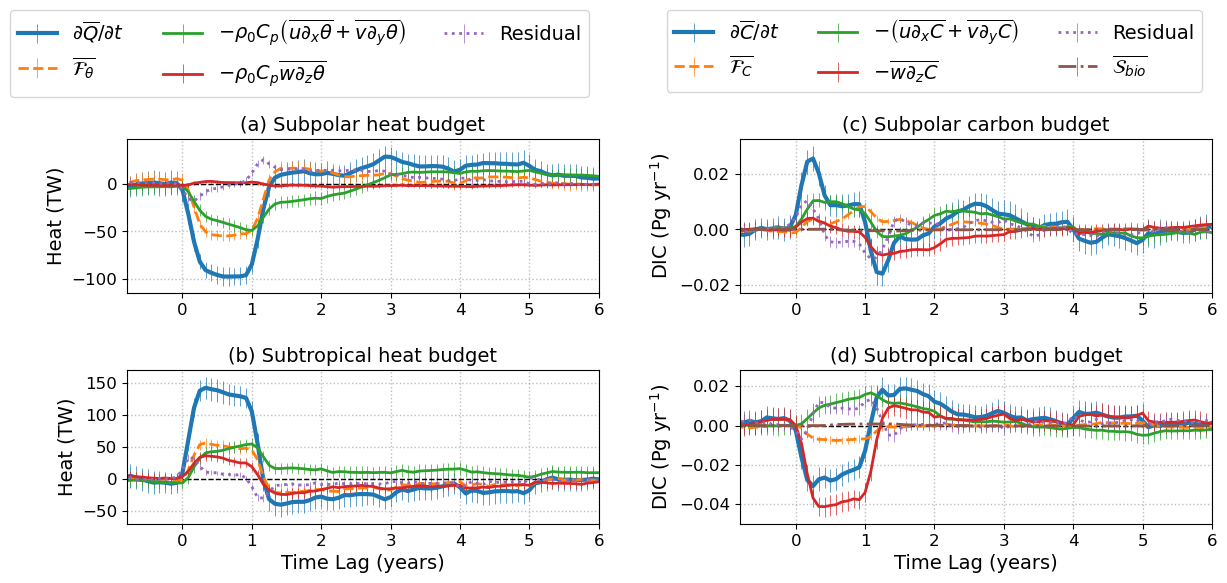

In [14]:
# 1000 m 

region_list = ['_North_Atlantic_Subpolar', '_North_Atlantic_Subtropical']
reg_lab = [r'Subpolar', r'Subtropical']


fac = [1./1e12, 1000. * 1.e-15 * 3600*24*365] # convert heat budget in terawatts (from watts) and DIC budget in Pg/year (from kg/s)

label_tend = [r'${\partial \overline{Q}/\partial t}$', r'${\partial \overline{C}/\partial t}$']
label_hor = [r'$-\rho_0C_p\left(\overline{u\partial_x\theta} + \overline{v\partial_y\theta} \right)$',
             r'$-\left(\overline{u\partial_xC} + \overline{v\partial_yC} \right)$']
label_ver = [r'$-\rho_0C_p\overline{w\partial_z\theta}$',
             r'$-\overline{w\partial_zC}$']

grid1 = plt.GridSpec(2, 2, wspace=0.3, hspace=0.5)
fig = plt.figure(figsize=[14,5])

for i in range(0,2):
    j = 0
    for region in region_list:
        ax = fig.add_subplot(grid1[j, i])
        ax.errorbar(ds[i]['time'], ds[i]['dt_' + var_list[i] + region]* fac[i], 
                    yerr = (ds[i]['dt_' + var_list[i] + region + '_confidence_upper'] 
                            - ds[i]['dt_' + var_list[i] + region + '_confidence_lower'])* fac[i]*0.5, #0.5 factor proper errorbars
                    lw=3., elinewidth=0.5, label= label_tend[i])
        if(i==0):
            ax.errorbar(ds[i]['time'], ds[i]['hfds' + region]* fac[i], 
                        yerr = (ds[i]['hfds' + region + '_confidence_upper'] - 
                                ds[i]['hfds' + region + '_confidence_lower'])* fac[i]*0.5,
                        lw=2., elinewidth=0.5, ls='--', label= r'$\overline{\mathcal{F}_{\theta}}$') 
            # 95% confidence interval (+- yerr = (upper-bound -lower_bound)*0.5 = 2*standard_error)
        else:
            ax.errorbar(ds[i]['time'], ds[i]['fgco2' + region]* fac[i], 
                        yerr = (ds[i]['fgco2' + region + '_confidence_upper'] - 
                                ds[i]['fgco2' + region + '_confidence_lower'])* fac[i]*0.5,
                        lw=2., elinewidth=0.5, ls='--', label= r'$\overline{\mathcal{F}_{C}}$')
            
        ax.errorbar(ds[i]['time'], ds[i][var_list[i] + '_hor_div' + region]* fac[i], 
                    yerr = (ds[i][var_list[i] + '_hor_div' + region + '_confidence_upper'] -
                           ds[i][var_list[i] + '_hor_div' + region + '_confidence_lower'])* fac[i] * 0.5, 
                    lw=2., elinewidth=0.5, label= label_hor[i])
        ax.errorbar(ds[i]['time'], ds[i][var_list[i] + '_ver_div' + region]* fac[i], 
                    yerr = (ds[i][var_list[i] + '_ver_div' + region + '_confidence_upper'] -
                           ds[i][var_list[i] + '_ver_div' + region + '_confidence_lower'])* fac[i] * 0.5, 
                    lw=2., elinewidth=0.5, label= label_ver[i])

        ax.errorbar(ds[i]['time'], ds[i][var_list[i]+ '_res' + region]* fac[i], 
                    yerr = (ds[i][var_list[i]+ '_res' + region + '_confidence_upper'] -
                            ds[i][var_list[i]+ '_res' + region + '_confidence_lower'])* fac[i]*0.5, ls=':', 
                    lw=2., elinewidth=0.5, label='Residual')
        if(i==1):
            ax.errorbar(ds[i]['time'], ds[i]['particulate_flux' + region]* fac[i], 
                        yerr = (ds[i]['particulate_flux' + region + '_confidence_upper'] -
                                ds[i]['particulate_flux' + region + '_confidence_lower'])* fac[i]*0.5, ls='-.', 
                        lw=2., elinewidth=0.5, label=r'$\overline{\mathcal{S}_{bio}}$')

        ax.set_xlim([-0.8, 6.]);
        plt.xticks(fontsize = 12); plt.yticks(fontsize = 12);
        ax.axhline(y=0, ls='--', lw=1, color='k')
        ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
        
        if(j==1):
            ax.set_xlabel('Time Lag (years)', fontsize=14)
            plt.legend(loc='upper right', bbox_to_anchor=(1.0, 3.4), ncol=3, fontsize=14);

        if(i==0):
            ax.set_ylabel('Heat (TW)', fontsize=14)
            #ax.set_ylim([-60., 60.]);
            #plt.yticks(np.arange(-50,60,25))
            ax.set_title('(' + chr(97+j) + ') ' + reg_lab[j]+ ' heat budget', fontsize=14)
        else:
            ax.set_ylabel(r'DIC (Pg yr$^{-1}$)', fontsize=14)
            #ax.set_ylim([-0.05, 0.05]);
            #plt.yticks(np.arange(-0.04,0.05,0.02))
            ax.set_title('(' + chr(99+j) + ') ' + reg_lab[j]+ ' carbon budget', fontsize=14)
        
        j = j + 1

fig.savefig('/home/users/hkhatri/Plots/Figures_Carbon_Thermal_2024/Tracer_Budget_1km.pdf', 
            dpi=300,bbox_inches='tight');
fig.savefig('/home/users/hkhatri/Plots/Figures_Carbon_Thermal_2024/Tracer_Budget_1km.png', 
            dpi=300,bbox_inches='tight');

### Figure: PO4 budget

In [15]:
ppdir = ("/gws/nopw/j04/unicorns/carbon_add_redis" + 
         "/Fast_SLow_NAO/MOHC/UKESM1-0-LL/historical/")

var_list = ['po4']

ds = []
for var in var_list:
    d = xr.open_dataset(ppdir + "all_ensembles/Timeseries/" + var + "_Budget_new_regions_2_depth_100.nc")
    d = d.drop('time').assign_coords(time=d['time.year'] + d['time.month']/12 - 1902 + 6./12)
    ds.append(d)

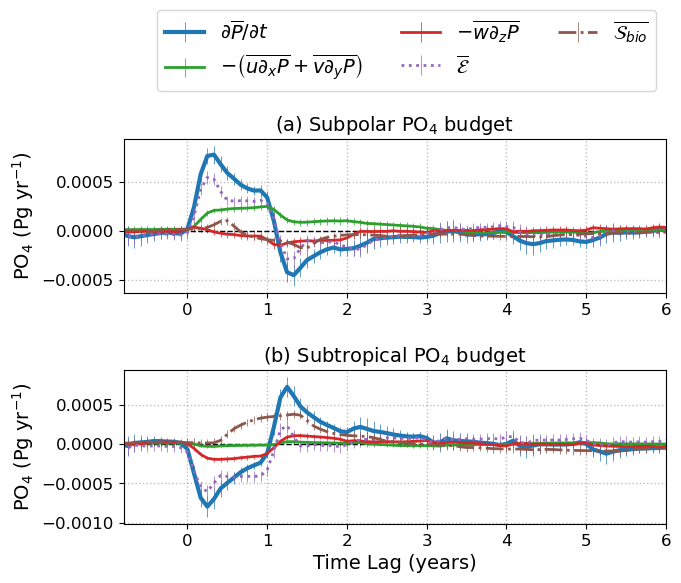

In [22]:
region_list = ['_North_Atlantic_Subpolar', '_North_Atlantic_Subtropical']
reg_lab = [r'Subpolar', r'Subtropical']


fac = [1000. * 1.e-15 * 3600*24*365] # convert po4 budget in Pg/year (from kg/s)

label_tend = [r'${\partial \overline{P}/\partial t}$']
label_hor = [r'$-\left(\overline{u\partial_xP} + \overline{v\partial_yP} \right)$']
label_ver = [r'$-\overline{w\partial_zP}$']

grid1 = plt.GridSpec(2,1, wspace=0.3, hspace=0.5)
fig = plt.figure(figsize=[7,5])

for i in range(0,1):
    j = 0
    for region in region_list:
        ax = fig.add_subplot(grid1[j, i])
        ax.errorbar(ds[i]['time'], ds[i]['dt_' + var_list[i] + region]* fac[i], 
                    yerr = (ds[i]['dt_' + var_list[i] + region + '_confidence_upper'] 
                            - ds[i]['dt_' + var_list[i] + region + '_confidence_lower'])* fac[i]*0.5, #0.5 factor proper errorbars
                    lw=3., elinewidth=0.5, label= label_tend[i])

        ax.plot(ds[i]['time'], ds[i]['time']*0., lw=0.) # dummy plotting to get color scheme right
        
        ax.errorbar(ds[i]['time'], ds[i][var_list[i] + '_hor_div' + region]* fac[i], 
                    yerr = (ds[i][var_list[i] + '_hor_div' + region + '_confidence_upper'] -
                           ds[i][var_list[i] + '_hor_div' + region + '_confidence_lower'])* fac[i] * 0.5, 
                    lw=2., elinewidth=0.5, label= label_hor[i])
        ax.errorbar(ds[i]['time'], ds[i][var_list[i] + '_ver_div' + region]* fac[i], 
                    yerr = (ds[i][var_list[i] + '_ver_div' + region + '_confidence_upper'] -
                           ds[i][var_list[i] + '_ver_div' + region + '_confidence_lower'])* fac[i] * 0.5, 
                    lw=2., elinewidth=0.5, label= label_ver[i])


        ax.errorbar(ds[i]['time'], ds[i][var_list[i]+ '_res_bio' + region]* fac[i], 
                    yerr = (ds[i][var_list[i]+ '_res_bio' + region + '_confidence_upper'] -
                            ds[i][var_list[i]+ '_res_bio' + region + '_confidence_lower'])* fac[i]*0.5, ls=':', 
                    lw=2., elinewidth=0.5, label=r'$\overline{\mathcal{E}}$')
        ax.errorbar(ds[i]['time'], ds[i]['particulate_flux' + region]* fac[i], 
                    yerr = (ds[i]['particulate_flux' + region + '_confidence_upper'] -
                            ds[i]['particulate_flux' + region + '_confidence_lower'])* fac[i]*0.5, ls='-.', 
                    lw=2., elinewidth=0.5, label=r'$\overline{\mathcal{S}_{bio}}$')

        ax.set_xlim([-0.8, 6.]);
        plt.xticks(fontsize = 12); plt.yticks(fontsize = 12);
        ax.axhline(y=0, ls='--', lw=1, color='k')
        ax.grid(color='gray', alpha=0.5, linestyle=':', lw=1.)
        
        if(j==1):
            ax.set_xlabel('Time Lag (years)', fontsize=14)
            plt.legend(loc='upper right', bbox_to_anchor=(1.0, 3.4), ncol=3, fontsize=14);


        ax.set_ylabel(r'PO$_4$ (Pg yr$^{-1}$)', fontsize=14)
        #ax.set_ylim([-0.05, 0.05]);
        #plt.yticks(np.arange(-0.04,0.05,0.02))
        ax.set_title('(' + chr(97+j) + ') ' + reg_lab[j] + ' PO$_4$ budget', fontsize=14)
        
        j = j + 1

fig.savefig('/home/users/hkhatri/Plots/Figures_Carbon_Thermal_2024/PO4_Budget.pdf', 
            dpi=300,bbox_inches='tight');
fig.savefig('/home/users/hkhatri/Plots/Figures_Carbon_Thermal_2024/PO4_Budget.png', 
            dpi=300,bbox_inches='tight');